<div style="text-align: center;">
    <h2>Pima Indians Diabetes traitement</h2>


</div>

#### Titre : 'Pima Indians Diabetes Database'
La variable de diagnostic, d'une valeur binaire d'une enquête est de savoir si le patient présente des signes de diabète selon l’OMS.
#### Sources :
Propriétaires d'origine : National Institute of Diabetes and Digestive and Kidney Diseases.
#### Informations pertinentes :
- En particulier, tous les patients sont des femmes d'au moins 21 ans d'origine indienne Pima.
- Nombre d'instances : 768
- Nombre d'attributs : 8 plus la classe
#### Les attributs : (tous à valeur numérique)
- Nombre de grossesses (Pregnancies).
- Taux de glucose (Glucose) : Concentration de glucose plasmatique à 2 heures dans un test de tolérance au glucose par voie orale.
- Pression artérielle diastolique en mm Hg (BloodPressure).
- Épaisseur du pli cutané du triceps en mm (SkinThickness).
- Taux d'insuline sérique sur 2 heures (Insulin).
- Indice de masse corporelle en (poids en kg/(taille en m)^2) (BMI).
- Fonction de pedigree du diabète (DiabetesPedigreeFunction).
- Âge en ans (Age).
- Résultat (Présence de diabète ou non) (Outcome) : Catégoriel (0 ou 1).
#### Distribution de classe : 
La valeur de classe 1 est interprétée comme "testé positif pour le diabète".
#### Valeur de classe Nombre d'instances
- 0 (test négatif) : 500
- 1 (test positif) : 268

In [268]:
import pandas as pd

In [269]:
df = pd.read_csv(r'Pima Indians Diabetes Database\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [270]:
df.shape

(768, 9)

# compter les valeurs de 0

In [271]:
df[df.loc[:,:]==0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [273]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [274]:
df.duplicated().sum()

0

# afficher les valeurs aberantes avec boxplot

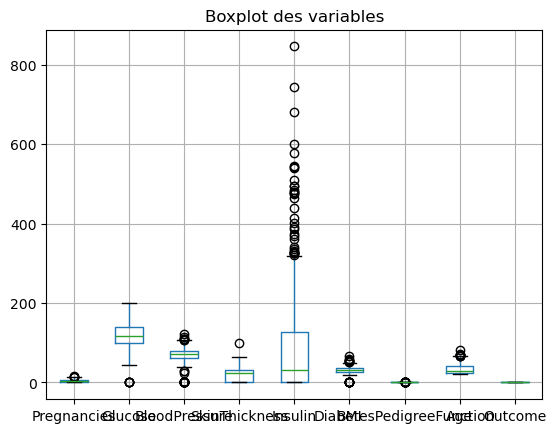

In [275]:
df.boxplot()
plt.title("Boxplot des variables")
plt.show()

In [276]:

for col in df.columns :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Définir les limites pour les valeurs aberrantes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifier les valeurs aberrantes
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Remplacer les valeurs aberrantes par les limites
    df[col] = df[col].clip(lower_bound, upper_bound)

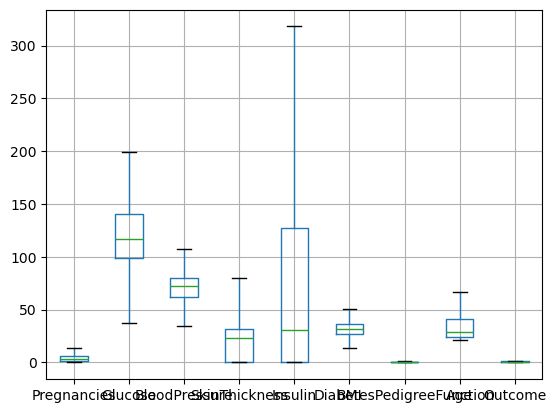

In [277]:
df.boxplot()
plt.show()

# remplacer 0 par la median

In [278]:
cols_ivalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in cols_ivalid_zero :
    median = df[i].median()
    df[i] = df[i].replace(0,median)

In [279]:
df[df.loc[:,:]==0].count()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [280]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,30.5,33.6,0.627,50.0,1
1,1.0,85.0,66,29,30.5,26.6,0.351,31.0,0
2,8.0,183.0,64,23,30.5,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1


# data split

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
#separation de X et y
X = df.drop('Outcome',axis = 1)
y = df['Outcome']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,stratify = y ,random_state = 11 )

# code

In [282]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Fonctions d’activation
# -------------------------------

def relu(x):
    """
    ReLU activation : max(0, x)
    """
    assert isinstance(x, np.ndarray), "Input to ReLU must be a numpy array"
    result = np.maximum(0, x)
    assert np.all(result >= 0), "ReLU output must be non-negative"
    return result

def relu_derivative(x):
    """
    Derivative of ReLU: 1 if x > 0, else 0
    """
    assert isinstance(x, np.ndarray), "Input to ReLU derivative must be a numpy array"
    result = np.where(x > 0, 1, 0)
    assert np.all((result == 0) | (result == 1)), "ReLU derivative must be 0 or 1"
    return result

def sigmoid(x):
    """
    Sigmoid activation : 1 / (1 + exp(-x))
    """
    assert isinstance(x, np.ndarray), "Input to sigmoid must be a numpy array"
    result = 1 / (1 + np.exp(-x))
    assert np.all((result >= 0) & (result <= 1)), "Sigmoid output must be in [0, 1]"
    return result

def sigmoid_derivative(x):
    """
    Derivative of sigmoid: sigmoid(x) * (1 - sigmoid(x))
    """
    assert isinstance(x, np.ndarray), "Input to sigmoid derivative must be a numpy array"
    s = sigmoid(x)
    result = s * (1 - s)
    assert np.all((result >= 0) & (result <= 0.25)), "Sigmoid derivative must be in [0, 0.25]"
    return result


In [283]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01, l2_lambda=0.0):
        """
        Initialize the neural network with given layer sizes and learning rate.
        layer_sizes : list of int [input_size, hidden1_size, ..., output_size]
        learning_rate : float
        l2_lambda : float, coefficient for L2 regularization
        """
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements"
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers"
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be positive"
        assert isinstance(l2_lambda, (int, float)) and l2_lambda >= 0, "L2 regularization must be non-negative"

        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda

        self.weights = []
        self.biases = []

        np.random.seed(42)
        # Initialize weights with Xavier initialization and biases with zeros
        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * np.sqrt(2 / layer_sizes[i])
            b = np.zeros((1, layer_sizes[i + 1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i + 1]), f"Weight matrix {i + 1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i + 1]), f"Bias vector {i + 1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):
        """
        Forward propagation:
        Z^{[l]} = A^{[l-1]} W^{[l]} + b^{[l]}
        A^{[l]} = g(Z^{[l]}) with sigmoid activation
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"

        self.activations = [X]
        self.z_values = []

        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            assert z.shape == (X.shape[0], self.layer_sizes[i + 1]), f"Z^{i + 1} has incorrect shape"
            self.z_values.append(z)
            a = sigmoid(z)
            self.activations.append(a)

        assert self.activations[-1].shape == (X.shape[0], self.layer_sizes[-1]), "Output activation has incorrect shape"
        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy loss:
        J = -1/m * sum(y*log(y_pred) + (1-y)*log(1-y_pred))
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"

        m = y_true.shape[0]
        # Add small epsilon to avoid log(0)
        epsilon = 1e-8
        loss = -np.sum(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon)) / m

        # Add L2 regularization loss
        if self.l2_lambda > 0:
            l2_loss = 0.5 * self.l2_lambda * sum(np.sum(w ** 2) for w in self.weights)
            loss += l2_loss / m

        assert not np.isnan(loss), "Loss computation resulted in NaN"
        return loss

    def compute_accuracy(self, y_true, y_pred):
        """
        Compute accuracy : proportion of correct predictions
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"

        preds = (y_pred >= 0.5).astype(int)
        accuracy = np.mean(preds == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs):
        """
        Backpropagation : compute gradients dW^{[l]}, db^{[l]} for each layer
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape == outputs.shape, "y and outputs must have the same shape"

        m = X.shape[0]
        self.d_weights = [np.zeros_like(w) for w in self.weights]
        self.d_biases = [np.zeros_like(b) for b in self.biases]

        # Output layer error
        dZ = outputs - y
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape"

        self.d_weights[-1] = (self.activations[-2].T @ dZ) / m
        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m

        # Backpropagate through hidden layers
        for i in range(len(self.weights) - 2, -1, -1):
            dA = dZ @ self.weights[i + 1].T
            dZ = dA * sigmoid_derivative(self.activations[i + 1])
            assert dZ.shape == (m, self.layer_sizes[i + 1]), f"dZ at layer {i + 1} has incorrect shape"
            self.d_weights[i] = (self.activations[i].T @ dZ) / m

            # Add L2 regularization to weight gradients
            if self.l2_lambda > 0:
                self.d_weights[i] += (self.l2_lambda / m) * self.weights[i]

            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m

        # Update weights and biases using gradient descent
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * self.d_weights[i]
            self.biases[i] -= self.learning_rate * self.d_biases[i]

    def train(self, X, y, X_val, y_val, epochs, batch_size):
        """
        Train the neural network using mini-batch SGD, with validation
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays"
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]

                outputs = self.forward(X_batch)
                epoch_loss += self.compute_loss(y_batch, outputs)
                self.backward(X_batch, y_batch, outputs)

            train_loss = epoch_loss / (X.shape[0] / batch_size)

            # Validation loss and accuracy
            val_outputs = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_outputs)

            train_accuracy = self.compute_accuracy(y, self.forward(X))
            val_accuracy = self.compute_accuracy(y_val, val_outputs)

            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        """
        Predict class labels (0 or 1)
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"

        outputs = self.forward(X)
        predictions = (outputs >= 0.5).astype(int)
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape"
        return predictions

# Exemple d'utilisation avec le dataset diabetes.csv

# Charger et préparer les données
data = df.copy()

# Séparer les features et la cible
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
assert X.shape[1] == 8, "Expected 8 features in input data"

# Standardisation : (X - mu) / sigma
mu = X.mean(axis=0)
sigma = X.std(axis=0)
X = (X - mu) / sigma

# Diviser les données en train, validation et test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)  # 0.25 x 0.8 = 0.2

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples"



# entrainement avec learning rate 0.01  l2_lambda=0.001

In [284]:
# Créer et entraîner le modèle ... learning rate 0.01
layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=0.01, l2_lambda=0.001)

train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# Prédictions et évaluation
y_pred = nn.predict(X_test)
print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred))


Epoch 0, Train Loss: 0.6871, Val Loss: 0.6572, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6775, Val Loss: 0.6513, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6732, Val Loss: 0.6460, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 30, Train Loss: 0.6705, Val Loss: 0.6408, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 40, Train Loss: 0.6704, Val Loss: 0.6357, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 50, Train Loss: 0.6564, Val Loss: 0.6305, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 60, Train Loss: 0.6567, Val Loss: 0.6252, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 70, Train Loss: 0.6554, Val Loss: 0.6198, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 80, Train Loss: 0.6454, Val Loss: 0.6142, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 90, Train Loss: 0.6419, Val Loss: 0.6083, Train Acc: 0.6522, Val Acc: 0.6494

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# entrainement avec learning rate 0.1  l2_lambda=0.001

In [285]:
# Créer et entraîner le modèle ... learning rate 0.1
layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=0.1, l2_lambda=0.001)

train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# Prédictions et évaluation
y_pred = nn.predict(X_test)
print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred))


Epoch 0, Train Loss: 0.6862, Val Loss: 0.6519, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6327, Val Loss: 0.5971, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 20, Train Loss: 0.5762, Val Loss: 0.5315, Train Acc: 0.7109, Val Acc: 0.7338
Epoch 30, Train Loss: 0.5340, Val Loss: 0.4818, Train Acc: 0.7413, Val Acc: 0.7922
Epoch 40, Train Loss: 0.5234, Val Loss: 0.4626, Train Acc: 0.7717, Val Acc: 0.7532
Epoch 50, Train Loss: 0.4893, Val Loss: 0.4495, Train Acc: 0.7848, Val Acc: 0.7792
Epoch 60, Train Loss: 0.4788, Val Loss: 0.4481, Train Acc: 0.7957, Val Acc: 0.7662
Epoch 70, Train Loss: 0.4813, Val Loss: 0.4494, Train Acc: 0.7957, Val Acc: 0.7662
Epoch 80, Train Loss: 0.4778, Val Loss: 0.4503, Train Acc: 0.8000, Val Acc: 0.7792
Epoch 90, Train Loss: 0.4727, Val Loss: 0.4512, Train Acc: 0.8022, Val Acc: 0.7727

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       100
           1       0.6

# entrainement avec learning rate 1  l2_lambda=0.001

In [286]:
# Créer et entraîner le modèle ... learning rate 1
layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=1, l2_lambda=0.001)

train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# Prédictions et évaluation
y_pred = nn.predict(X_test)
print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred))


Epoch 0, Train Loss: 0.6925, Val Loss: 0.6059, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.4797, Val Loss: 0.4484, Train Acc: 0.8022, Val Acc: 0.7792
Epoch 20, Train Loss: 0.4630, Val Loss: 0.4655, Train Acc: 0.8043, Val Acc: 0.7857
Epoch 30, Train Loss: 0.4644, Val Loss: 0.4513, Train Acc: 0.8130, Val Acc: 0.7792
Epoch 40, Train Loss: 0.4610, Val Loss: 0.6178, Train Acc: 0.6804, Val Acc: 0.6948
Epoch 50, Train Loss: 0.4367, Val Loss: 0.4569, Train Acc: 0.8217, Val Acc: 0.7857
Epoch 60, Train Loss: 0.4296, Val Loss: 0.4763, Train Acc: 0.7891, Val Acc: 0.7403
Epoch 70, Train Loss: 0.4272, Val Loss: 0.5514, Train Acc: 0.7739, Val Acc: 0.7338
Epoch 80, Train Loss: 0.4237, Val Loss: 0.4913, Train Acc: 0.8326, Val Acc: 0.7597
Epoch 90, Train Loss: 0.4254, Val Loss: 0.5212, Train Acc: 0.8391, Val Acc: 0.7468

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.91      0.60      0.72       100
           1       0.5

# entrainement avec learning rate 1  l2_lambda=0.007 avec 1 couche 

In [287]:
# Créer et entraîner le modèle ... learning rate 1
layer_sizes = [X_train.shape[1], 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=1, l2_lambda=0.007)

train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# Prédictions et évaluation
y_pred = nn.predict(X_test)
print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred))

Epoch 0, Train Loss: 0.6619, Val Loss: 0.5287, Train Acc: 0.7326, Val Acc: 0.7403
Epoch 10, Train Loss: 0.4909, Val Loss: 0.4605, Train Acc: 0.8000, Val Acc: 0.7792
Epoch 20, Train Loss: 0.4774, Val Loss: 0.4579, Train Acc: 0.8109, Val Acc: 0.7792
Epoch 30, Train Loss: 0.4698, Val Loss: 0.4624, Train Acc: 0.8130, Val Acc: 0.7857
Epoch 40, Train Loss: 0.4554, Val Loss: 0.4722, Train Acc: 0.8130, Val Acc: 0.7792
Epoch 50, Train Loss: 0.4493, Val Loss: 0.4679, Train Acc: 0.8217, Val Acc: 0.7662
Epoch 60, Train Loss: 0.4363, Val Loss: 0.4812, Train Acc: 0.8217, Val Acc: 0.7727
Epoch 70, Train Loss: 0.4473, Val Loss: 0.4980, Train Acc: 0.8239, Val Acc: 0.7662
Epoch 80, Train Loss: 0.4295, Val Loss: 0.5201, Train Acc: 0.8152, Val Acc: 0.7532
Epoch 90, Train Loss: 0.4128, Val Loss: 0.5170, Train Acc: 0.8304, Val Acc: 0.7662

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       100
           1       0.6

In [288]:
# Créer et entraîner le modèle ... learning rate 1
layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=1, l2_lambda=0.007)

train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# Prédictions et évaluation
y_pred = nn.predict(X_test)
print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred))


Epoch 0, Train Loss: 0.6978, Val Loss: 0.6070, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.4880, Val Loss: 0.4497, Train Acc: 0.8022, Val Acc: 0.7792
Epoch 20, Train Loss: 0.4731, Val Loss: 0.4677, Train Acc: 0.8043, Val Acc: 0.7857
Epoch 30, Train Loss: 0.4769, Val Loss: 0.4523, Train Acc: 0.8065, Val Acc: 0.7792
Epoch 40, Train Loss: 0.4749, Val Loss: 0.6275, Train Acc: 0.6674, Val Acc: 0.6818
Epoch 50, Train Loss: 0.4536, Val Loss: 0.4560, Train Acc: 0.8174, Val Acc: 0.7857
Epoch 60, Train Loss: 0.4505, Val Loss: 0.4714, Train Acc: 0.7913, Val Acc: 0.7338
Epoch 70, Train Loss: 0.4518, Val Loss: 0.5408, Train Acc: 0.7587, Val Acc: 0.7403
Epoch 80, Train Loss: 0.4511, Val Loss: 0.4780, Train Acc: 0.8174, Val Acc: 0.7792
Epoch 90, Train Loss: 0.4576, Val Loss: 0.5015, Train Acc: 0.8391, Val Acc: 0.7662

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.89      0.59      0.71       100
           1       0.5

In [289]:
# Créer et entraîner le modèle ... learning rate 1
layer_sizes = [X_train.shape[1], 17, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=1, l2_lambda=0.007)

train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# Prédictions et évaluation
y_pred = nn.predict(X_test)
print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred))


Epoch 0, Train Loss: 0.6799, Val Loss: 0.6601, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.4914, Val Loss: 0.4559, Train Acc: 0.7978, Val Acc: 0.7792
Epoch 20, Train Loss: 0.4801, Val Loss: 0.4785, Train Acc: 0.8022, Val Acc: 0.7922
Epoch 30, Train Loss: 0.4878, Val Loss: 0.4650, Train Acc: 0.8065, Val Acc: 0.7662
Epoch 40, Train Loss: 0.4841, Val Loss: 0.6526, Train Acc: 0.6565, Val Acc: 0.6818
Epoch 50, Train Loss: 0.4609, Val Loss: 0.4584, Train Acc: 0.8022, Val Acc: 0.7857
Epoch 60, Train Loss: 0.4607, Val Loss: 0.4718, Train Acc: 0.7957, Val Acc: 0.7532
Epoch 70, Train Loss: 0.4618, Val Loss: 0.4992, Train Acc: 0.7674, Val Acc: 0.7662
Epoch 80, Train Loss: 0.4599, Val Loss: 0.4667, Train Acc: 0.8174, Val Acc: 0.7468
Epoch 90, Train Loss: 0.4607, Val Loss: 0.4724, Train Acc: 0.8283, Val Acc: 0.7857

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       100
           1       0.5

Epoch 0, Train Loss: 0.6978, Val Loss: 0.6070, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.4880, Val Loss: 0.4497, Train Acc: 0.8022, Val Acc: 0.7792
Epoch 20, Train Loss: 0.4731, Val Loss: 0.4677, Train Acc: 0.8043, Val Acc: 0.7857
Epoch 30, Train Loss: 0.4769, Val Loss: 0.4523, Train Acc: 0.8065, Val Acc: 0.7792
Epoch 40, Train Loss: 0.4749, Val Loss: 0.6275, Train Acc: 0.6674, Val Acc: 0.6818
Epoch 50, Train Loss: 0.4536, Val Loss: 0.4560, Train Acc: 0.8174, Val Acc: 0.7857
Epoch 60, Train Loss: 0.4505, Val Loss: 0.4714, Train Acc: 0.7913, Val Acc: 0.7338
Epoch 70, Train Loss: 0.4518, Val Loss: 0.5408, Train Acc: 0.7587, Val Acc: 0.7403
Epoch 80, Train Loss: 0.4511, Val Loss: 0.4780, Train Acc: 0.8174, Val Acc: 0.7792
Epoch 90, Train Loss: 0.4576, Val Loss: 0.5015, Train Acc: 0.8391, Val Acc: 0.7662

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.89      0.59      0.71       100
           1       0.5

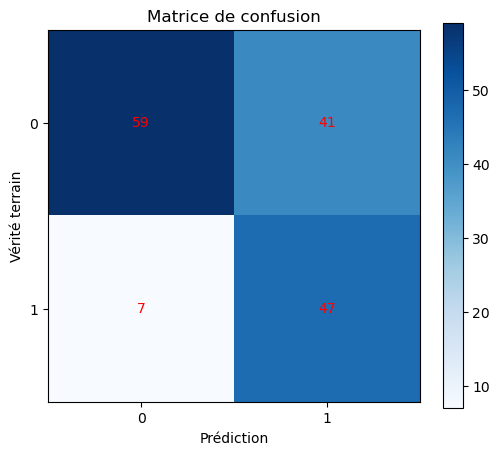

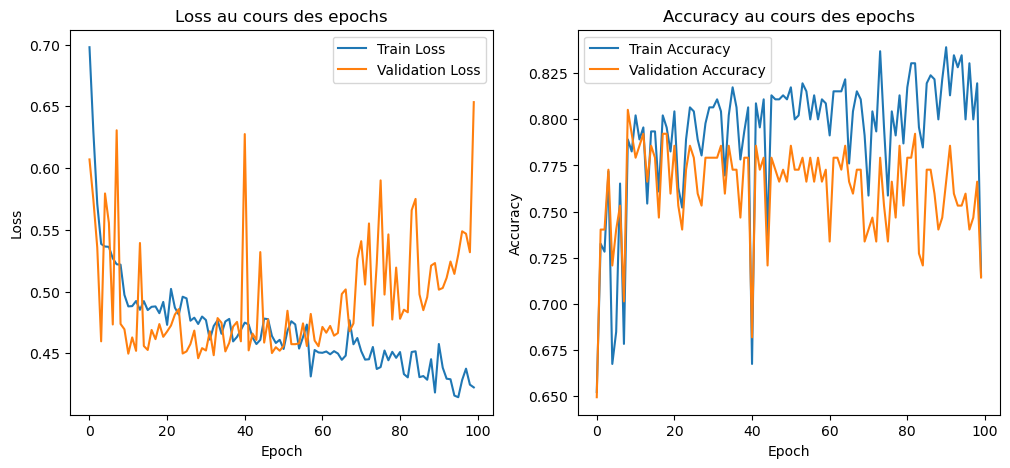

In [290]:
# Créer et entraîner le modèle
layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=1, l2_lambda=0.007)

train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# Prédictions et évaluation
y_pred = nn.predict(X_test)
print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.title("Matrice de confusion")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.xticks([0,1])
plt.yticks([0,1])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

# Courbes de perte et d'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Courbe de perte
ax1.plot(train_losses, label='Train Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_title("Loss au cours des epochs")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

# Courbe d'accuracy
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_title("Accuracy au cours des epochs")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.show()
